### Classification Decision Tree

- Load data, modules

In [13]:
d = r'C:\Users\tonya\Desktop\SpringBoardAssignments\Capstone2\df_1min_Ind.csv'
import pandas as pd
import numpy as np
# Import talib
import talib as ta
# d = "C:\Antoni courses\DecisionTrees\DT-Resources\data_modules\ACC.csv"
df = pd.read_csv(d)
df.shape  # (1440, 7)
df.tail()

,Date,Open,High,Low,Close,Vol,BidAsk
1435,2022-09-19 23:55:00,3925.50,3925.75,3925.25,3925.50,74,-36
1436,2022-09-19 23:56:00,3925.50,3925.75,3925.50,3925.50,67,-29
1437,2022-09-19 23:57:00,3925.50,3926.00,3925.50,3925.75,100,24
1438,2022-09-19 23:58:00,3925.50,3926.25,3925.50,3925.75,61,-10
1439,2022-09-19 23:59:00,3925.75,3926.25,3925.75,3926.25,45,-7


In [95]:
df.head(2)

,Date,Open,High,Low,Close,Vol,BidAsk,ADX,RSI,SMA,Return,target,Return15,Return10,Return5,target15,target10,target5
21,2022-09-19 00:21:00,3882.0,3882.5,3882.0,3882.25,66,14,NaN,NaN,NaN,0.000064,1,-0.000193,0.000258,-0.000064,0,1,0
22,2022-09-19 00:22:00,3882.5,3883.0,3882.5,3882.50,33,1,NaN,NaN,NaN,0.000064,1,-0.000064,-0.000129,0.000129,0,0,1


In [94]:
# Create the predictors
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Close'].values, timeperiod= 11)  # 4-7, 5-9, 6-11,7-13, 11-21
df['RSI'] = ta.RSI(df['Close'].values, timeperiod= 16)
df['SMA'] = ta.SMA(df['Close'].values, timeperiod= 22)

df.head(3)

,Date,Open,High,Low,Close,Vol,BidAsk,ADX,RSI,SMA,Return,target,Return15,Return10,Return5,target15,target10,target5
21,2022-09-19 00:21:00,3882.0,3882.5,3882.00,3882.25,66,14,NaN,NaN,NaN,0.000064,1,-0.000193,0.000258,-0.000064,0,1,0
22,2022-09-19 00:22:00,3882.5,3883.0,3882.50,3882.50,33,1,NaN,NaN,NaN,0.000064,1,-0.000064,-0.000129,0.000129,0,0,1
23,2022-09-19 00:23:00,3882.5,3883.0,3882.25,3882.75,39,14,NaN,NaN,NaN,-0.000064,0,0.000000,0.000000,0.000000,0,0,0


In [93]:
# Create target variable
df['Return15'] = df['Close'].pct_change(1).shift(-15) # Target 15 min in future 
df['Return10'] = df['Close'].pct_change(1).shift(-10)  # Target 10 min in future 
df['Return5'] = df['Close'].pct_change(1).shift(-5)   # Target 5 min in future 
df['target15'] = np.where(df.Return15 > 0, 1, 0)
df['target10'] = np.where(df.Return10 > 0, 1, 0)
df['target5'] = np.where(df.Return5 > 0, 1, 0)

df.tail(3)

,Date,Open,High,Low,Close,Vol,BidAsk,ADX,RSI,SMA,Return,target,Return15,Return10,Return5,target15,target10,target5
1017,2022-09-19 16:57:00,3924.0,3924.00,3923.25,3923.25,180,-73,54.986065,56.647264,3923.397727,-0.000127,0,NaN,NaN,NaN,0,0,0
1018,2022-09-19 16:58:00,3923.5,3923.50,3922.50,3922.75,272,-102,50.539017,52.575626,3923.431818,0.000000,0,NaN,NaN,NaN,0,0,0
1019,2022-09-19 16:59:00,3923.0,3923.25,3922.75,3922.75,251,-15,46.496245,52.575626,3923.454545,0.000000,0,NaN,NaN,NaN,0,0,0


In [32]:
df.isna().sum()

Date          0
Open         59
High         59
Low          59
Close        59
Vol           0
BidAsk        0
ADX         441
RSI         436
SMA         441
Return        1
target        0
Return15     15
Return10     10
Return5       5
target15      0
target10      0
target5       0
dtype: int64

In [33]:
df = df.dropna()
df.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Vol         0
BidAsk      0
ADX         0
RSI         0
SMA         0
Return      0
target      0
Return15    0
Return10    0
Return5     0
target15    0
target10    0
target5     0
dtype: int64

In [54]:
df_w_Date_ind = df.copy()
df_w_Date_ind.index = df_w_Date_ind['Date']
type(df_w_Date_ind.index)  #pandas.core.indexes.base.Index
df_w_Date_ind.index = pd.to_datetime(df_w_Date_ind.index )
type(df_w_Date_ind.index)  #pandas.core.indexes.datetimes.DatetimeIndex
df_w_Date_ind.shape # (999, 18)
df_w_Date_ind.head()

,Date,Open,High,Low,Close,Vol,BidAsk,ADX,RSI,SMA,Return,target,Return15,Return10,Return5,target15,target10,target5
Date,,,,,,,,,,,,,,,,,,
2022-09-19 00:21:00,2022-09-19 00:21:00,3882.00,3882.50,3882.00,3882.25,66,14,26.989767,48.702868,3881.545455,0.000064,1,-0.000193,0.000258,-0.000064,0,1,0
2022-09-19 00:22:00,2022-09-19 00:22:00,3882.50,3883.00,3882.50,3882.50,33,1,27.001426,50.651146,3881.534091,0.000064,1,-0.000064,-0.000129,0.000129,0,0,1
2022-09-19 00:23:00,2022-09-19 00:23:00,3882.50,3883.00,3882.25,3882.75,39,14,26.187867,52.572540,3881.511364,-0.000064,0,0.000000,0.000000,0.000000,0,0,0
2022-09-19 00:24:00,2022-09-19 00:24:00,3882.75,3882.75,3882.50,3882.50,15,-4,25.448269,50.476232,3881.488636,-0.000193,0,0.000000,0.000064,-0.000064,0,1,0
2022-09-19 00:25:00,2022-09-19 00:25:00,3882.50,3882.75,3881.50,3881.75,61,-33,24.247543,44.764360,3881.443182,-0.000064,0,-0.000129,0.000258,0.000000,0,1,0


<AxesSubplot: xlabel='Date'>

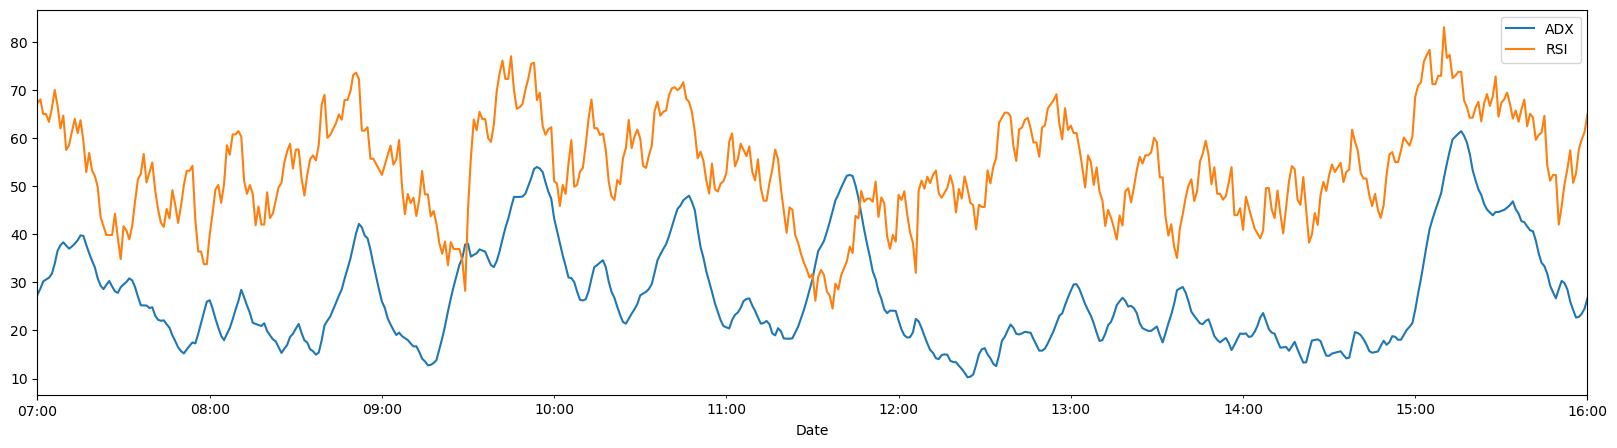

In [63]:
df_w_Date_ind['2022-09-19 07:00:00': '2022-09-19 16:00:00'].plot( y=['ADX', 'RSI'], figsize=(20,5)) 

<AxesSubplot: xlabel='Date'>

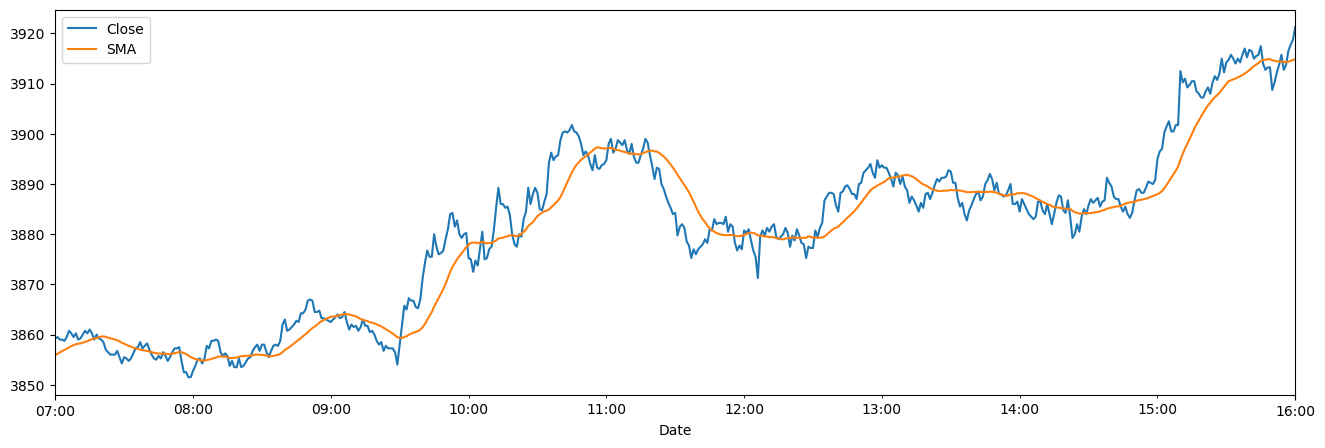

In [61]:
df_w_Date_ind['2022-09-19 07:00:00': '2022-09-19 16:00:00'].plot( y=['Close', 'SMA'], figsize=(16,5))  # 

<AxesSubplot: xlabel='Date'>

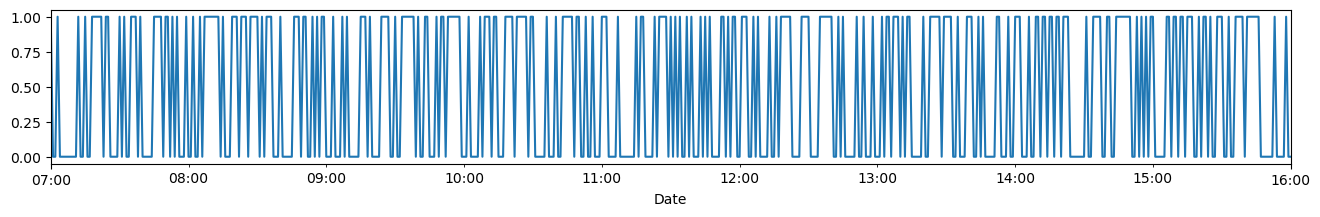

In [71]:
y15['2022-09-19 07:00:00': '2022-09-19 16:00:00'].plot( y=['y15'], figsize=(16,2))  # yes/no 1/0

In [75]:
df_w_Date_ind.shape

(999, 18)

In [72]:
df_w_Date_ind.head()


,Date,Open,High,Low,Close,Vol,BidAsk,ADX,RSI,SMA,Return,target,Return15,Return10,Return5,target15,target10,target5
Date,,,,,,,,,,,,,,,,,,
2022-09-19 00:21:00,2022-09-19 00:21:00,3882.00,3882.50,3882.00,3882.25,66,14,26.989767,48.702868,3881.545455,0.000064,1,-0.000193,0.000258,-0.000064,0,1,0
2022-09-19 00:22:00,2022-09-19 00:22:00,3882.50,3883.00,3882.50,3882.50,33,1,27.001426,50.651146,3881.534091,0.000064,1,-0.000064,-0.000129,0.000129,0,0,1
2022-09-19 00:23:00,2022-09-19 00:23:00,3882.50,3883.00,3882.25,3882.75,39,14,26.187867,52.572540,3881.511364,-0.000064,0,0.000000,0.000000,0.000000,0,0,0
2022-09-19 00:24:00,2022-09-19 00:24:00,3882.75,3882.75,3882.50,3882.50,15,-4,25.448269,50.476232,3881.488636,-0.000193,0,0.000000,0.000064,-0.000064,0,1,0
2022-09-19 00:25:00,2022-09-19 00:25:00,3882.50,3882.75,3881.50,3881.75,61,-33,24.247543,44.764360,3881.443182,-0.000064,0,-0.000129,0.000258,0.000000,0,1,0


<AxesSubplot: xlabel='Date'>

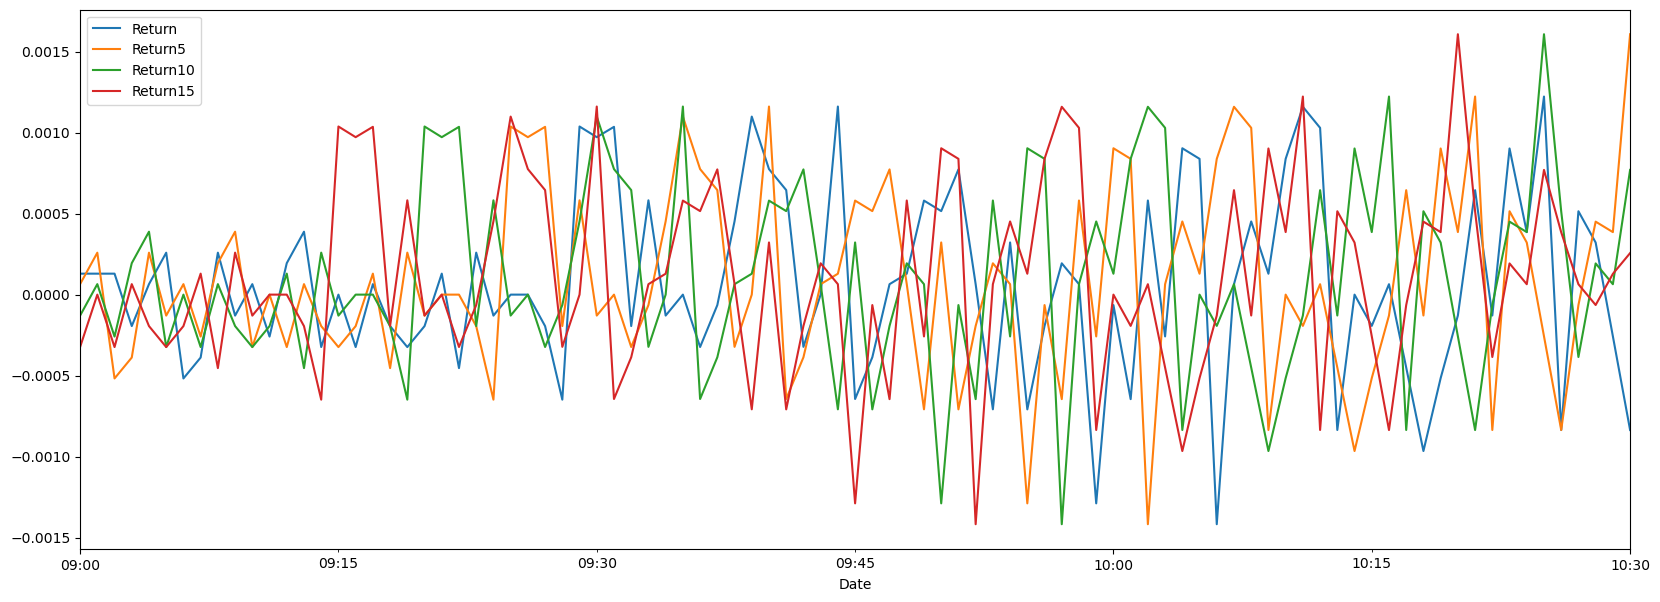

In [98]:
df_w_Date_ind['2022-09-19 09:00:00': '2022-09-19 10:30:00'].plot( y=['Return','Return5','Return10','Return15' ], figsize=(20,7))  # plot of returns in various intervals

<AxesSubplot: xlabel='Date'>

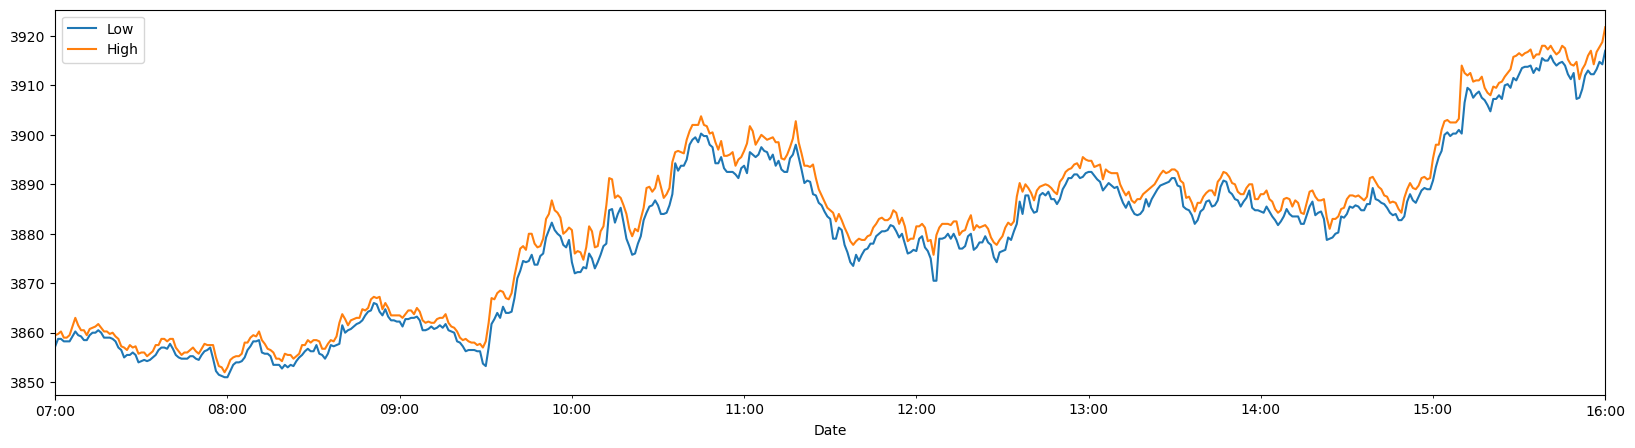

In [74]:
df_w_Date_ind['2022-09-19 07:00:00': '2022-09-19 16:00:00'].plot( y=['Low','High' ], figsize=(20,5))  # 

In [66]:

X = df_w_Date_ind[predictors_list]
print(X.tail())

y = df_w_Date_ind.target       # Target y within 1 min gains Yes/No
print('Target 1', y.sample(5))   

y15 = df_w_Date_ind.target15   # Target y within 15 min gains Yes/No
print("Target y15 ", y15.sample(5))

y10 = df_w_Date_ind.target10  # Target y within 10 min gains Yes/No
print('Target y10', y10.sample(5))

y5 = df_w_Date_ind.target5    # Target y within 5 min gains Yes/No
print('Target y5', y5.sample(5))

                           ADX        RSI          SMA
Date                                                  
2022-09-19 16:55:00  57.676951  66.094679  3923.170455
2022-09-19 16:56:00  58.351974  63.570387  3923.306818
2022-09-19 16:57:00  54.986065  56.647264  3923.397727
2022-09-19 16:58:00  50.539017  52.575626  3923.431818
2022-09-19 16:59:00  46.496245  52.575626  3923.454545
Target 1 Date
2022-09-19 05:13:00    1
2022-09-19 06:17:00    0
2022-09-19 05:09:00    0
2022-09-19 05:04:00    0
2022-09-19 13:30:00    0
Name: target, dtype: int32
Target y15  Date
2022-09-19 03:31:00    0
2022-09-19 13:17:00    0
2022-09-19 11:38:00    0
2022-09-19 15:50:00    0
2022-09-19 08:10:00    1
Name: target15, dtype: int32
Target y10 Date
2022-09-19 12:18:00    1
2022-09-19 06:05:00    0
2022-09-19 02:31:00    0
2022-09-19 08:06:00    0
2022-09-19 08:08:00    0
Name: target10, dtype: int32
Target y5 Date
2022-09-19 05:21:00    1
2022-09-19 01:30:00    0
2022-09-19 09:25:00    1
2022-09-19 06:19:0

In [103]:
predictors_list = ['ADX', 'RSI', 'SMA']
X = df_w_Date_ind[predictors_list]
print(X.tail())

y = df_w_Date_ind.target
print('Target y 1min', y.sample(5))

y15 = df_w_Date_ind.target15   # within 15 min gains Yes/No
print("Target y15 ", y15.sample(5))
y10 = df_w_Date_ind.target10  # within 10 min gains Yes/No
print('Target y10', y10.sample(5))
y5 = df_w_Date_ind.target5    # within 5 min gains Yes/No
print('Target y5', y5.sample(5))

                           ADX        RSI          SMA
Date                                                  
2022-09-19 16:55:00  57.676951  66.094679  3923.170455
2022-09-19 16:56:00  58.351974  63.570387  3923.306818
2022-09-19 16:57:00  54.986065  56.647264  3923.397727
2022-09-19 16:58:00  50.539017  52.575626  3923.431818
2022-09-19 16:59:00  46.496245  52.575626  3923.454545
Target y 1min Date
2022-09-19 11:45:00    0
2022-09-19 01:27:00    0
2022-09-19 11:07:00    1
2022-09-19 02:31:00    1
2022-09-19 12:00:00    0
Name: target, dtype: int32
Target y15  Date
2022-09-19 10:03:00    0
2022-09-19 16:54:00    0
2022-09-19 15:52:00    0
2022-09-19 06:02:00    1
2022-09-19 09:47:00    0
Name: target15, dtype: int32
Target y10 Date
2022-09-19 06:05:00    0
2022-09-19 02:06:00    1
2022-09-19 02:17:00    0
2022-09-19 12:00:00    1
2022-09-19 07:05:00    1
Name: target10, dtype: int32
Target y5 Date
2022-09-19 02:12:00    0
2022-09-19 09:51:00    0
2022-09-19 10:23:00    1
2022-09-19 12

In [87]:
y

21      1
22      1
23      0
24      0
25      0
       ..
1015    0
1016    0
1017    0
1018    0
1019    0
Name: target, Length: 999, dtype: int32

In [106]:
df_w_Date_ind.shape #(999, 18)
y.size  # 999
X.size  # 2997

2997

- Split Data

In [80]:
split_percentage = 0.8
split = int(split_percentage * len(X))
# Train data set
X_train = X[:split]
y_train = y[:split]
# Test data set
X_test = X[split:]
y_test = y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(799, 3) (799,)
(200, 3) (200,)


We have training data in the X_train and y_train for creating the classification tree model and a X_test and y_test to verify the model on unseen data.

## Create classification tree model

Using DecisionTreeClassifier from sklearn.tree to create the classification tree model. We choose to set min_samples_leaf to 5, and  experiment with other values to see what is optimal on the train dataset. 

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5 )
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

Create the fit() method to train the classifier on the train dataset.

In [ ]:
help(DecisionTreeClassifier) # details on DecisionTreeClassifier

In [82]:
clf = clf.fit(X_train, y_train)

## Visualize the model

Visualize the classification tree created in the step below using the graphviz and sklearn's tree package.

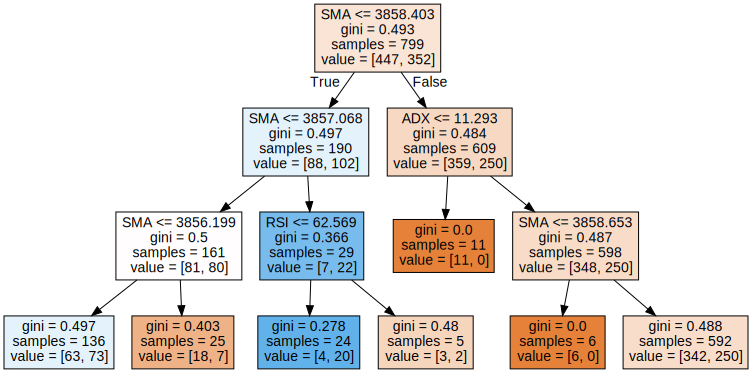

In [84]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None, filled=True, feature_names=predictors_list)
graphviz.Source(dot_data)

## Make Predictions

Once trained the decision tree classifier, we make predictions on the test data. To make predictions, the predict method of
the DecisionTreeClassifier class is used.

In [85]:
y_pred = clf.predict(X_test)

## Evaluate the Model Performance

Using Scikit-learn's performance report for classification metrics report. Measures like precision, recall, F1-score and support for each class. Precision and recall indicate the quality of our predictions. The f1-score gives us the harmonic mean of precision and recall. The support values are used as weights to compute the average values of precision, recall and F-1.

Anything above 0.5 is usually considered a good number. We have got an average recall of 0.51 which is just above the neutral for this model.
where the predicted is Target y, on 1 min.
Further we examine 5, 10, 15 min intervals.

In [86]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       102
           1       0.00      0.00      0.00        98

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modeling on 5 min interval return 

In [109]:
predictors_list = ['ADX', 'RSI', 'SMA']
X5 = df_w_Date_ind[predictors_list]
print(X.tail())

y5 = df_w_Date_ind.target5
print( y5.sample(5), 'Target y5 for 5 min')

# y15 = df_w_Date_ind.target15   # within 15 min gains Yes/No
# print("Target y15 ", y15.sample(5))

# y10 = df_w_Date_ind.target10  # within 10 min gains Yes/No
# print('Target y10', y10.sample(5))


                           ADX        RSI          SMA
Date                                                  
2022-09-19 16:55:00  57.676951  66.094679  3923.170455
2022-09-19 16:56:00  58.351974  63.570387  3923.306818
2022-09-19 16:57:00  54.986065  56.647264  3923.397727
2022-09-19 16:58:00  50.539017  52.575626  3923.431818
2022-09-19 16:59:00  46.496245  52.575626  3923.454545
Date
2022-09-19 16:05:00    0
2022-09-19 16:11:00    1
2022-09-19 10:49:00    0
2022-09-19 08:14:00    0
2022-09-19 14:55:00    1
Name: target5, dtype: int32 Target y5 for 5 min


In [110]:
split_percentage = 0.8
split = int(split_percentage*len(X))
# Train data set
X_train5 = X5[:split]
y_train5 = y5[:split]
# Test data set
X_test5 = X5[split:]
y_test5 = y5[split:]

print(X_train5.shape, y_train5.shape)
print(X_test5.shape, y_test5.shape)

(799, 3) (799,)
(200, 3) (200,)


In [126]:
from sklearn.tree import DecisionTreeClassifier
clf5 = DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_leaf= 9)
clf5

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=9)

In [127]:
clf5 = clf5.fit(X_train5, y_train5)

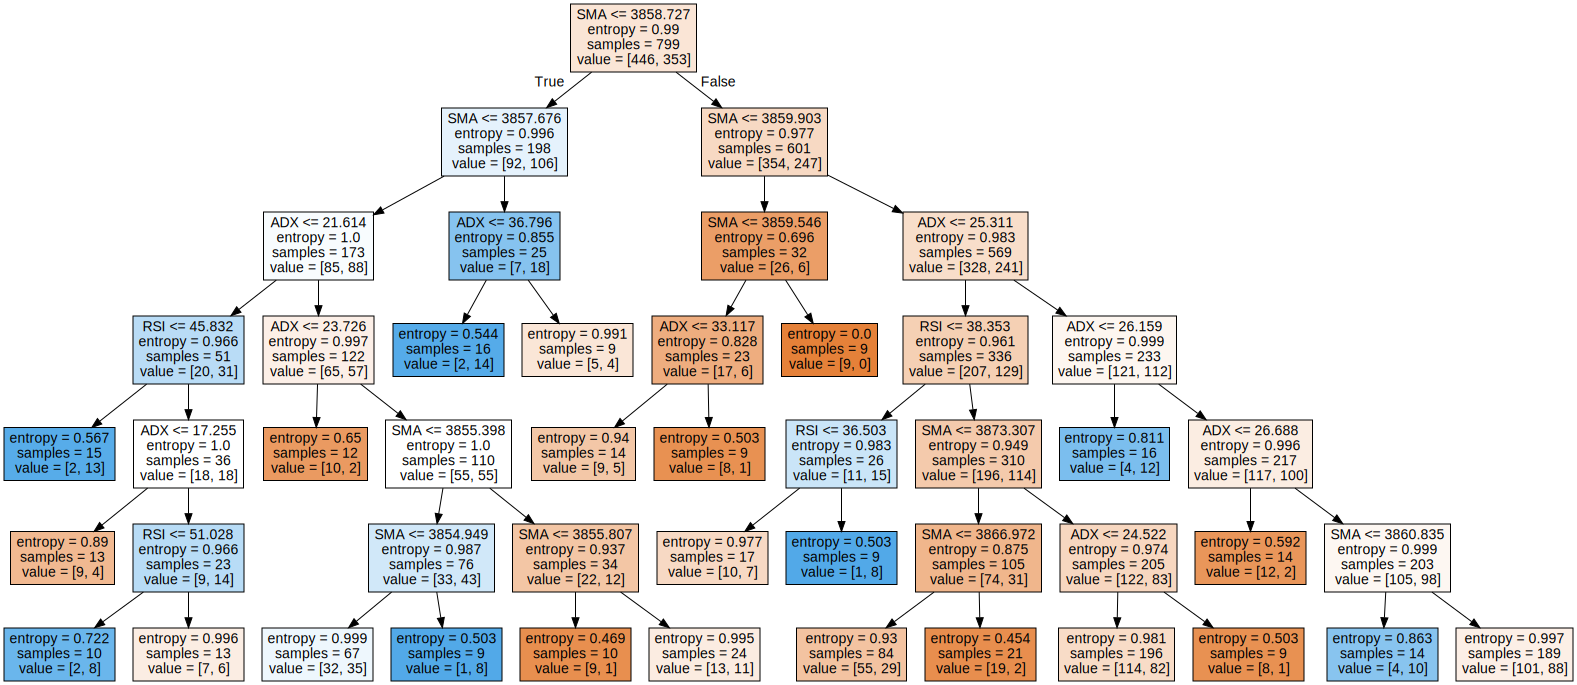

In [128]:
# from sklearn import tree
# import graphviz
dot_data = tree.export_graphviz( clf5, out_file= None, filled= True, feature_names= predictors_list)
graphviz.Source(dot_data)

In [129]:
y_pred5 = clf5.predict(X_test5)

In [125]:
from sklearn.metrics import classification_report   
report5 = classification_report(y_test5, y_pred5)  # with DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_leaf= 9)
print(report5)

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       105
           1       1.00      0.04      0.08        95

    accuracy                           0.55       200
   macro avg       0.77      0.52      0.39       200
weighted avg       0.76      0.55      0.40       200



In [115]:
from sklearn.metrics import classification_report
report5 = classification_report(y_test5, y_pred5)
print(report5)

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       105
           1       0.00      0.00      0.00        95

    accuracy                           0.53       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.28      0.53      0.36       200



c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall of 0.53 is slightly better then 0.51 recall for this 5 min model vs the previoues 1 min model. F1-score Accuracy at 0.53 Next we try 10 min. projection.

In [130]:
from sklearn.metrics import classification_report   
report5 = classification_report(y_test5, y_pred5)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_leaf= 9)
print(report5)  #ENTROPY gives so far better results then Gini. f1-score accuracy is 0.55, with precision at 0.76 and recall at 0.55

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       105
           1       1.00      0.04      0.08        95

    accuracy                           0.55       200
   macro avg       0.77      0.52      0.39       200
weighted avg       0.76      0.55      0.40       200



- Lets try 10 min interval

In [131]:
predictors_list = ['ADX', 'RSI', 'SMA']
X10 = df_w_Date_ind[predictors_list]
print(X10.tail())

y10 = df_w_Date_ind.target10  # within 10 min gains Yes/No
print('Target y10', y10.sample(5))

# y15 = df_w_Date_ind.target15   # within 15 min gains Yes/No
# print("Target y15 ", y15.sample(5))



                           ADX        RSI          SMA
Date                                                  
2022-09-19 16:55:00  57.676951  66.094679  3923.170455
2022-09-19 16:56:00  58.351974  63.570387  3923.306818
2022-09-19 16:57:00  54.986065  56.647264  3923.397727
2022-09-19 16:58:00  50.539017  52.575626  3923.431818
2022-09-19 16:59:00  46.496245  52.575626  3923.454545
Target y10 Date
2022-09-19 03:37:00    0
2022-09-19 13:45:00    1
2022-09-19 00:40:00    1
2022-09-19 15:35:00    1
2022-09-19 16:58:00    0
Name: target10, dtype: int32


In [132]:
split_percentage = 0.8
split = int(split_percentage*len(X))
# Train data set
X_train10 = X10[:split]
y_train10 = y10[:split]
# Test data set
X_test10 = X10[split:]
y_test10 = y10[split:]

print(X_train10.shape, y_train10.shape)
print(X_test10.shape, y_test10.shape)

(799, 3) (799,)
(200, 3) (200,)


In [192]:
from sklearn.tree import DecisionTreeClassifier
clf10 = DecisionTreeClassifier(criterion='entropy', max_depth= 4, min_samples_leaf= 7)
clf10

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=7)

In [193]:
clf10 = clf10.fit(X_train10, y_train10)

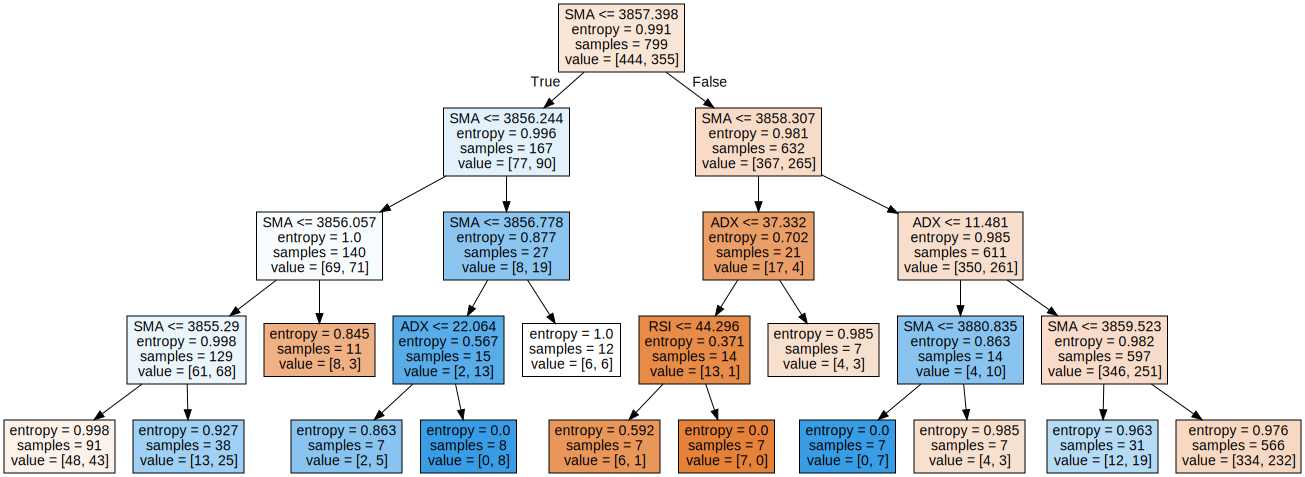

In [194]:
# from sklearn import tree;  import graphviz
dot_data10 = tree.export_graphviz( clf10, out_file= None, filled= True, feature_names= predictors_list)
graphviz.Source(dot_data10)

In [195]:
y_pred10 = clf10.predict(X_test10)

In [155]:
from sklearn.metrics import classification_report   
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_leaf= 9)
print(report10)  #ENTROPY 

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
from sklearn.metrics import classification_report   
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='gini', max_depth= 9, min_samples_leaf= 9)
print(report10)  # Gini performs better then Entropy for 10 min Intervals 

              precision    recall  f1-score   support

           0       0.55      0.98      0.70       108
           1       0.67      0.04      0.08        92

    accuracy                           0.55       200
   macro avg       0.61      0.51      0.39       200
weighted avg       0.60      0.55      0.42       200



In [150]:
from sklearn.metrics import classification_report   
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 15, min_samples_leaf= 15)
print(report10)  # Gini performs better then Entropy, but more max_depth and more min_samples_leaf  lowers the score 

              precision    recall  f1-score   support

           0       0.55      0.60      0.58       108
           1       0.48      0.42      0.45        92

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.52      0.52       200



In [160]:
# from sklearn.metrics import classification_report   # lets try some extremes: max_depth= 30, min_samples_leaf= 30
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 30, min_samples_leaf= 30)
print(report10)  # No discernable difference with boos of the max_depth= 30, min_samples_leaf= 30

              precision    recall  f1-score   support

           0       0.57      0.42      0.48       108
           1       0.48      0.63      0.54        92

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.53      0.52      0.51       200



In [165]:
# from sklearn.metrics import classification_report   # lets try gini w some extremes: max_depth= 30, min_samples_leaf= 30
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='gini', max_depth= 30, min_samples_leaf= 30)
print(report10)  # Even somewhat lower scores with gini and No discernable difference with boos of the max_depth= 30, min_samples_leaf= 30

              precision    recall  f1-score   support

           0       0.57      0.42      0.48       108
           1       0.48      0.63      0.54        92

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.53      0.52      0.51       200



In [171]:
# from sklearn.metrics import classification_report   # lets try gini w lowering: max_depth= 3, min_samples_leaf= 30
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='gini', max_depth= 3, min_samples_leaf= 30)
print(report10)  # Even  lower scores ... 

              precision    recall  f1-score   support

           0       0.52      0.90      0.66       108
           1       0.21      0.03      0.06        92

    accuracy                           0.50       200
   macro avg       0.37      0.47      0.36       200
weighted avg       0.38      0.50      0.38       200



In [186]:
# from sklearn.metrics import classification_report   # lets try gini w max_depth= 15, min_samples_leaf= 9
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='gini', max_depth= 4, min_samples_leaf= 9)
print(report10)  # Somewhat higher

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
# from sklearn.metrics import classification_report   # lets try gini w max_depth= 15, min_samples_leaf= 9
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf= 6)
print(report10)  # Even  lower scores ... Optimal for 10 min seemed to be 

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
# from sklearn.metrics import classification_report   # lets try gini w max_depth= 15, min_samples_leaf= 9
report10 = classification_report(y_test10, y_pred10)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 4, min_samples_leaf= 7)
print(report10)  # Even  lower scores ... Optimal for 10 min seemed to be Entropy w max_depth= 4, min_samples_leaf= 7

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200



c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tonya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Lets finally try 15 min intervals

In [197]:
predictors_list = ['ADX', 'RSI', 'SMA']
X15 = df_w_Date_ind[predictors_list]
# print(X15.tail())

y15 = df_w_Date_ind.target15   # within 15 min gains Yes/No
print("Target y15 ", y15.sample(5))

split_percentage = 0.8; split = int(split_percentage*len(X))
# Train data set
X_train15 = X15[:split]
y_train15 = y15[:split]
# Test data set
X_test15 = X15[split:]
y_test15 = y15[split:]

print(X_train15.shape, y_train15.shape)
print(X_test15.shape, y_test15.shape)

Target y15  Date
2022-09-19 10:51:00    0
2022-09-19 04:12:00    0
2022-09-19 03:54:00    0
2022-09-19 16:58:00    0
2022-09-19 15:35:00    0
Name: target15, dtype: int32
(799, 3) (799,)
(200, 3) (200,)


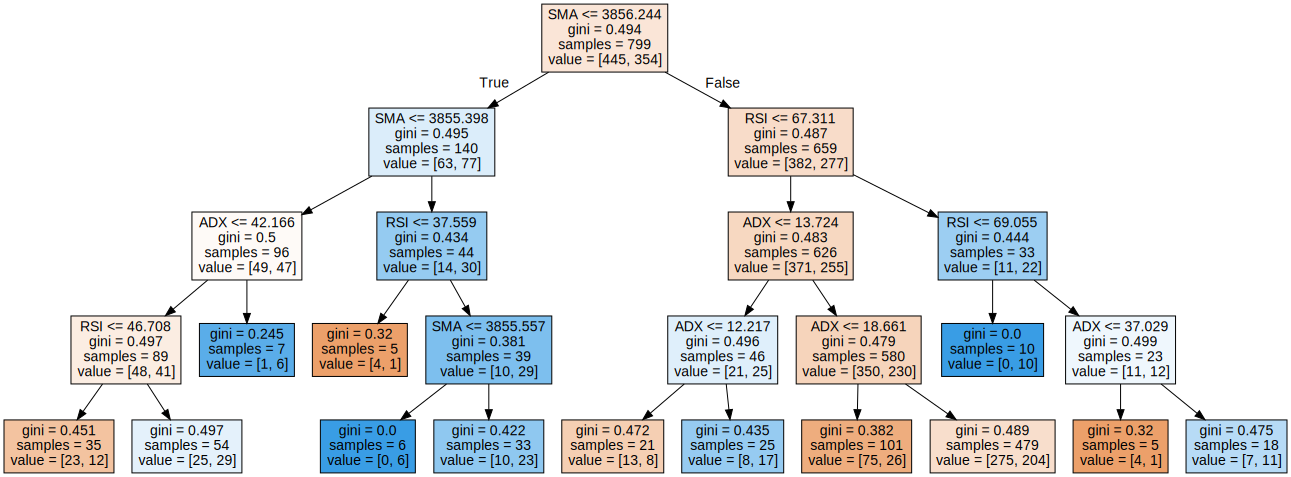

In [210]:
# from sklearn.tree import DecisionTreeClassifier
clf15 = DecisionTreeClassifier(criterion='gini', max_depth= 4, min_samples_leaf= 4)
clf15

clf15 = clf15.fit(X_train15, y_train15)

# from sklearn import tree;  import graphviz
dot_data15 = tree.export_graphviz( clf15, out_file= None, filled= True, feature_names= predictors_list)
graphviz.Source(dot_data15)


In [211]:
y_pred15 = clf15.predict(X_test15)

In [199]:
from sklearn.metrics import classification_report   
report15 = classification_report(y_test15, y_pred15)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_leaf= 9)
print(report15)  # 15 min shows best results so far for ENTROPY max_depth= 6, min_samples_leaf= 9

              precision    recall  f1-score   support

           0       0.57      0.92      0.70       110
           1       0.59      0.14      0.23        90

    accuracy                           0.57       200
   macro avg       0.58      0.53      0.47       200
weighted avg       0.58      0.57      0.49       200



In [203]:
from sklearn.metrics import classification_report   
report15 = classification_report(y_test15, y_pred15)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 6, min_samples_leaf= 5)
print(report15)  # 15 min shows best results so far for ENTROPY max_depth= 6, min_samples_leaf= 5

              precision    recall  f1-score   support

           0       0.53      0.79      0.64       110
           1       0.36      0.14      0.21        90

    accuracy                           0.50       200
   macro avg       0.45      0.47      0.42       200
weighted avg       0.45      0.50      0.44       200



In [206]:
from sklearn.metrics import classification_report   
report15 = classification_report(y_test15, y_pred15)  # with DecisionTreeClassifier(criterion='entropy', max_depth= 12, min_samples_leaf= 12)
print(report15)  # 15 min shows above 50 f1-score results so far for ENTROPY 

              precision    recall  f1-score   support

           0       0.57      0.83      0.67       110
           1       0.53      0.23      0.32        90

    accuracy                           0.56       200
   macro avg       0.55      0.53      0.50       200
weighted avg       0.55      0.56      0.52       200



In [209]:
from sklearn.metrics import classification_report   
report15 = classification_report(y_test15, y_pred15)  # with DecisionTreeClassifier(criterion='gini', max_depth= 12, min_samples_leaf= 12)
print(report15)  # for Gini and Entropy identical results 

              precision    recall  f1-score   support

           0       0.57      0.83      0.67       110
           1       0.53      0.23      0.32        90

    accuracy                           0.56       200
   macro avg       0.55      0.53      0.50       200
weighted avg       0.55      0.56      0.52       200



In [212]:
from sklearn.metrics import classification_report   
report15 = classification_report(y_test15, y_pred15)  # with DecisionTreeClassifier(criterion='gini', max_depth= 4, min_samples_leaf= 4)
print(report15)  # for Gini w: criterion='gini', max_depth= 4, min_samples_leaf= 4 shows Optimal results

              precision    recall  f1-score   support

           0       0.57      0.88      0.69       110
           1       0.57      0.19      0.28        90

    accuracy                           0.57       200
   macro avg       0.57      0.54      0.49       200
weighted avg       0.57      0.57      0.51       200



Conclusion: 15 min intervals show greatest promise with 57 f1-score at accuracy and criterion='gini', max_depth= 4, min_samples_leaf= 4
- Not to be overlooked: this training set is based on 3 features training sets only, ADX, SMA & RSI. More and better features could push the score higher.
- Should be taken into consideration when constructing more complex models, that 15 min with above params convereged to higher scores then lower intervals (10, 5, 1) .